<a href="https://colab.research.google.com/github/minyoy/ML-DL-Basics-study/blob/main/wk4/assignment_wk4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. scikit-learn을 활용해 모든 방향으로 같은 성질의 정규분포(등방성 가우시안 정규분포)를 가지는 가상 데이터를 생성해보세요.

- 샘플(`n_samples`)의 개수를 90개로 지정해보세요.
- 클러스터 중심/센트로이드(`center`)를 3개로 지정해보세요.

In [ ]:
from sklearn.datasets import make_blobs

# make_blobs 함수로 총 샘플의 수 90, 3개의 중심 클러스터로 y 라벨이 0,1,2로 결정됨
X, y = make_blobs(n_samples=90, centers=3, random_state=42)

2. scikit-learn와, matplotlib을 활용해 KMeans 알고리즘 과정에서의 각각의 iteration 나타내는 그래프를 그리는 함수를 만들어보세요.

- `plot_KMeans` 함수는 n(cluster의 개수)만은 인자로 받는 함수입니다.
- model에 KMeans 모델을 만들어보세요.
    - cluster의 중심을 3개로 만들어보세요.
    - 초기화 방법을 "random"로 지정하세요.
    - 각 그래프마다 iteration 수가 1씩 증가해야하므로, 초기 중심위치 시도 횟수는 1로, 최대 반복 횟수를 n으로 지정해보세요.
    - X 데이터를 학습시켜 보세요.
- cluster의 중심을 각각 c0, c1, c2에 지정하세요.
- X 데이터를 scatter plot으로 그려보세요. (색깔은 label의 종류별로 다르게 지정해보세요.)
- cluster의 중심을 scatter plot으로 그려보세요. (`marker`는 `^`로, 사이즈는 200으로 지정해보세요.)

In [ ]:
# plot_KMeans 함수를 선언하고, n을 인자로 받음
# KMeans 모델의 n_clusters 인자로 클러스터 중심을 3개로, init 인자로 초기 클러스터 중심을 random하게,
# 초기 중심위치 시도횟수를 n_init인자로 1로 설정, max_iter로 최대 반복 횟수를 n으로 지정
def plot_KMeans(n):
  model = KMeans(n_clusters=3, init="random", n_init=1, max_iter=n)
  model.fit(X)

  # model의 cluster_centers_ 속성으로 클러스터의 중심을 각각 c0, c1, c2에 지정
  c0, c1, c2 = model.cluster_centers_

  # X 데이터를 y값이 0,1,2일때로 나누어 각각 다른 색으로 산점도 그래프를 그림
  plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'indigo')
  plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'steelblue')
  plt.scatter(X[y == 2, 0], X[y == 2, 1], c = 'green')

  # 클러스터 중심인 c0,c1,c2를 이용해서 마커 표시
  plt.scatter(c0[0], c0[1], marker='x', s=200, c='r')
  plt.scatter(c1[0], c1[1], marker='x', s=200, c='r')
  plt.scatter(c2[0], c2[1], marker='x', s=200, c='r')

  plt.legend()

  # 추후에 표시를 하기 위해서 모델의 이너셔인 클러스터 내 오차 제곱합을 반환
  return model.inertia_

/tmp/ipython-input-2435554253.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


155.6817018015837

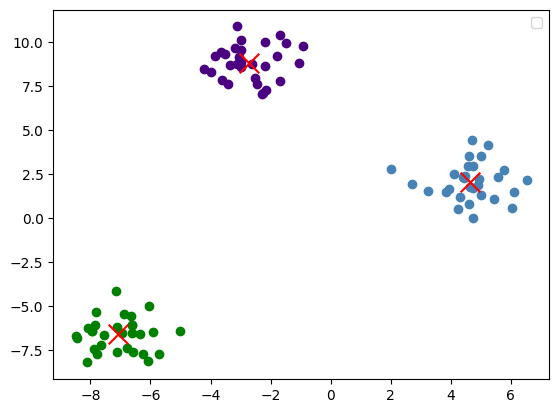

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 앞서 선언했던 함수로 산점도 그래프를 그림
plot_KMeans(3)

3. 위에서 만든 `plot_KMeans`함수를 가지고 KMeans iteration이 1부터 4일때, 각각의 경우를 subplot에 그려보세요.

- (for 문을 활용해) col과 row가 2인 2x2 subplot을 만들어보세요.
- `plot_KMeans`를 활용해 KMeans iteration이 1부터 4까지 순서대로 subplot 위치에 그려보세요.

(+ 참고 : 그래프를 다 완성하고 나서, iteration이 더 큰데 불구하고 inertia가 더 큰 경우가 있습니다. 현재 위의 코드는 모델에서 한 번 학습할 때, KMeans 알고리즘의 반복 횟수대로 그린게 아니기 때문입니다. 즉, iteration=1일 때, KMeans 알고리즘을 한 번만 반복하고 끝내고, iteration=2일 때, 다시 처음부터 알고리즘이 시작하기 때문입니다.)

/tmp/ipython-input-2435554253.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-2435554253.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-2435554253.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-2435554253.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


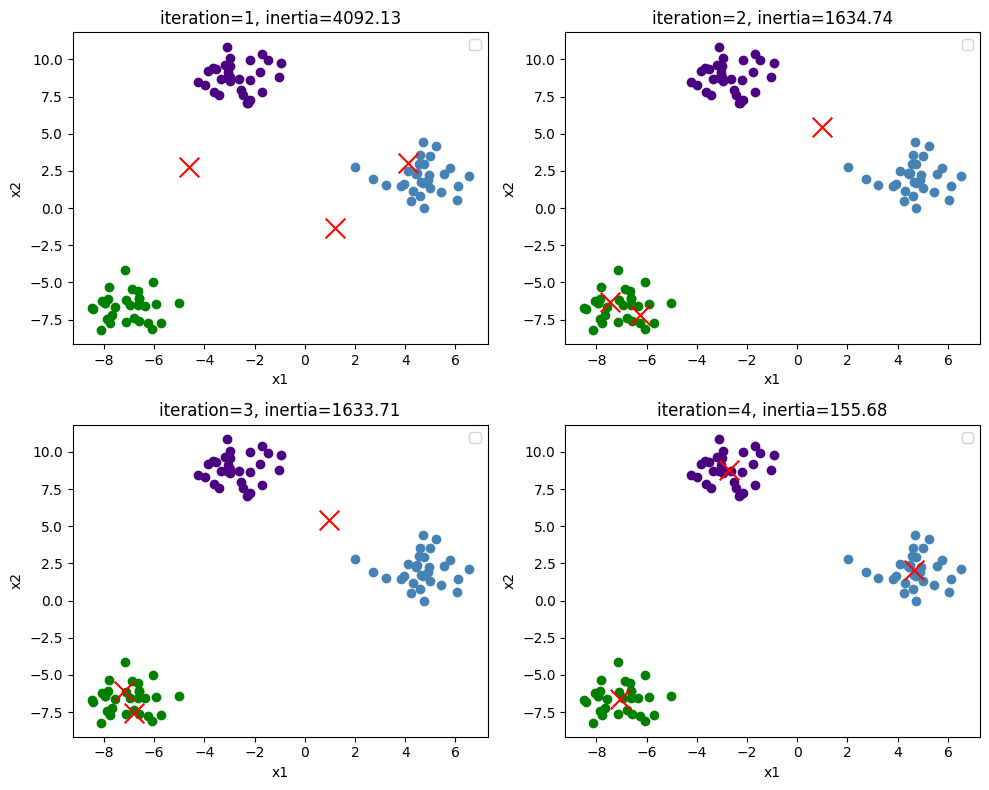

In [ ]:
from itertools import product

fig, axs = plt.subplots(2,2, figsize=(10, 8))

# plot 4 subplots
# axs.flat은 서브플롯 배열을 1차원으로 반환해줘서
# enumerate으로 인덱스와 각 subplot 객체 쌍을 반환
# sca는 Set Current Axes의 줄임말로 현재 그릴 대상을 지정
# 앞서 선언한 함수를 호출해서 inertia를 받아옴
# 각 그래프의 순서와 inertia를 제목으로 붙임
for idx, ax in enumerate(axs.flat, start=1):
    plt.sca(ax)
    inertia = plot_KMeans(idx)
    ax.set_title(f"iteration={idx}, inertia={inertia:.2f}")
    ax.set_xlabel("x1"); ax.set_ylabel("x2")

# tight_layout은 subplot들이 서로 겹치지않게 자동으로 간격을 조정해줌
plt.tight_layout()
plt.show()
